## The DATA SET : Open Power Systems Data

We'll be working with daily time series of Open Power System Data (OPSD)
for Germany, which has been rapidly expanding its renewable energy
production in recent years. The data set includes country-wide totals of
electricity consumption, wind power production, and solar power
production for 2006-2017. link for the data [click
here](https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv)

### The columns of the data file are:

-   Date --- The date (yyyy-mm-dd format)
-   Consumption --- Electricity consumption in GWh
-   Wind --- Wind power production in GWh
-   Solar --- Solar power production in GWh
-   Wind+Solar --- Sum of wind and solar power production in GWh

##We will explore how electricity consumption and production in Germany
have varied over time :

-   When is electricity consumption typically highest and lowest?

-   How do wind and solar power production vary with seasons of the
    year?

-   What are the long-term trends in electricity consumption, solar
    power, and wind power?
## CREATING THE DATAFRAME FROM DATA

In [ ]:

library(readxl)
library(tidyverse)
mydata <- read_excel("E:/R/OPSV_GERMANY.xlsx")

#looking at head and tail of dataframe

In [47]:
head(mydata)
tail(mydata)

Date,Consumption,Wind,Solar,Wind+Solar
2010-01-04,1346.2499999999998,59.31799999999999,NA,NA
2010-01-03,1132.069,22.963,NA,NA
2010-01-06,1434.0550000000003,14.131999999999998,NA,NA
2010-01-05,1457.374,41.623999999999995,NA,NA
2009-12-31,1106.4669999999999,NA,NA,NA
2009-12-30,1192.1960000000004,NA,NA,NA


Date,Consumption,Wind,Solar,Wind+Solar
2015-10-08,1476.6840000000002,50.85999999999999,44.709,NA
2013-03-12,1428.0729999999999,58.433,37.771,NA
2013-11-22,1437.637,87.925,8.982,NA
2017-01-22,1340.3410000000001,50.77400000000001,47.385999999999996,NA
2014-08-31,1079.792,37.955,60.84,NA
2017-12-20,1559.68569,90.88,8.799,NA


#### adding year date month from dataset

In [48]:
x<-mydata$Date

year<-as.numeric(format(x,"%Y"))
head(year)

month <- as.numeric(format(x,"%m"))

day<-as.numeric(format(x,"%d"))

head(month)

[1] 2010 2010 2010 2010 2009 2009

[1]  1  1  1  1 12 12

#### add these 3 colom in dataset

In [10]:
newdata<- cbind(mydata,year,month,day)
head(newdata)


Date,Consumption,Wind,Solar,Wind+Solar,year,month,day
2010-01-04,1346.2499999999998,59.31799999999999,NA,NA,2010,1,4
2010-01-03,1132.069,22.963,NA,NA,2010,1,3
2010-01-06,1434.0550000000003,14.131999999999998,NA,NA,2010,1,6
2010-01-05,1457.374,41.623999999999995,NA,NA,2010,1,5
2009-12-31,1106.4669999999999,NA,NA,NA,2009,12,31
2009-12-30,1192.1960000000004,NA,NA,NA,2009,12,30


##### changing data types for usage in plots

In [11]:
newdata$Date<- as.Date(newdata$Date)
newdata$Consumption<-as.numeric(newdata$Consumption)
newdata$Wind<-as.numeric(newdata$Wind)
newdata$Solar<-as.numeric(newdata$Solar)
newdata$`Wind+Solar`<-as.numeric(newdata$`Wind+Solar`)
summary(newdata)

      Date             Consumption          Wind             Solar        
 Min.   :2006-01-01   Min.   : 842.4   Min.   :  5.757   Min.   :  1.968  
 1st Qu.:2008-12-31   1st Qu.:1217.9   1st Qu.: 62.353   1st Qu.: 35.179  
 Median :2012-01-01   Median :1367.1   Median :119.098   Median : 86.407  
 Mean   :2012-01-01   Mean   :1338.7   Mean   :164.814   Mean   : 89.259  
 3rd Qu.:2014-12-31   3rd Qu.:1457.8   3rd Qu.:217.900   3rd Qu.:135.071  
 Max.   :2017-12-31   Max.   :1709.6   Max.   :826.278   Max.   :241.580  
                                       NA's   :1463      NA's   :2195     
   Wind+Solar        year          month             day       
 Min.   : NA    Min.   :2006   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: NA    1st Qu.:2008   1st Qu.: 4.000   1st Qu.: 8.00  
 Median : NA    Median :2012   Median : 7.000   Median :16.00  
 Mean   :NaN    Mean   :2012   Mean   : 6.523   Mean   :15.73  
 3rd Qu.: NA    3rd Qu.:2014   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   : NA    

#comsumption over years

Warning message:
"Removed 1461 rows containing missing values (geom_path)."

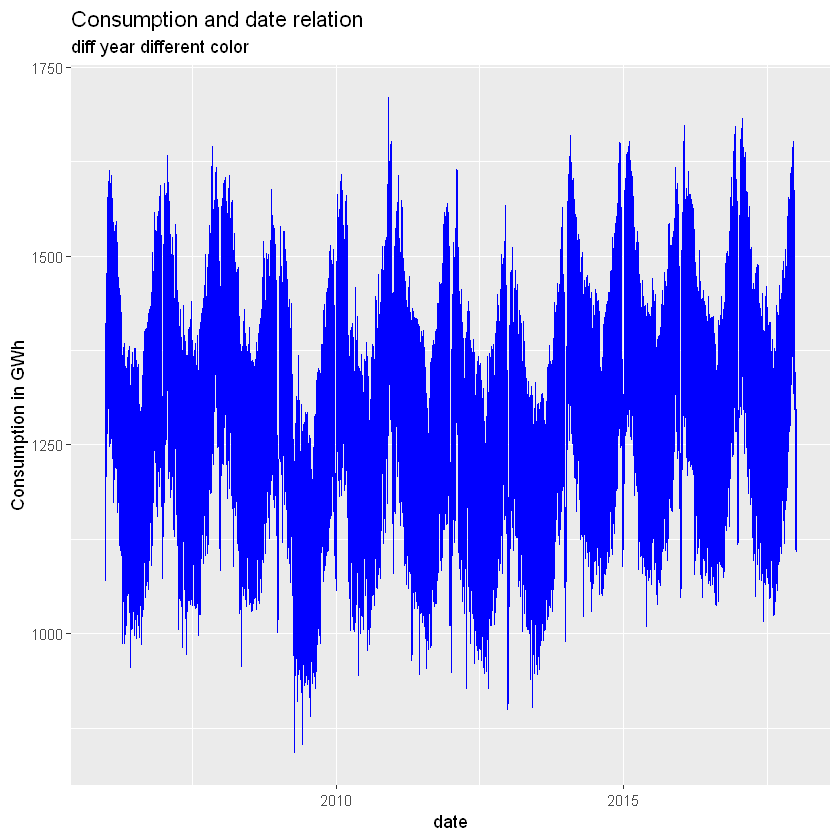

Warning message:
"Removed 2191 rows containing missing values (geom_path)."

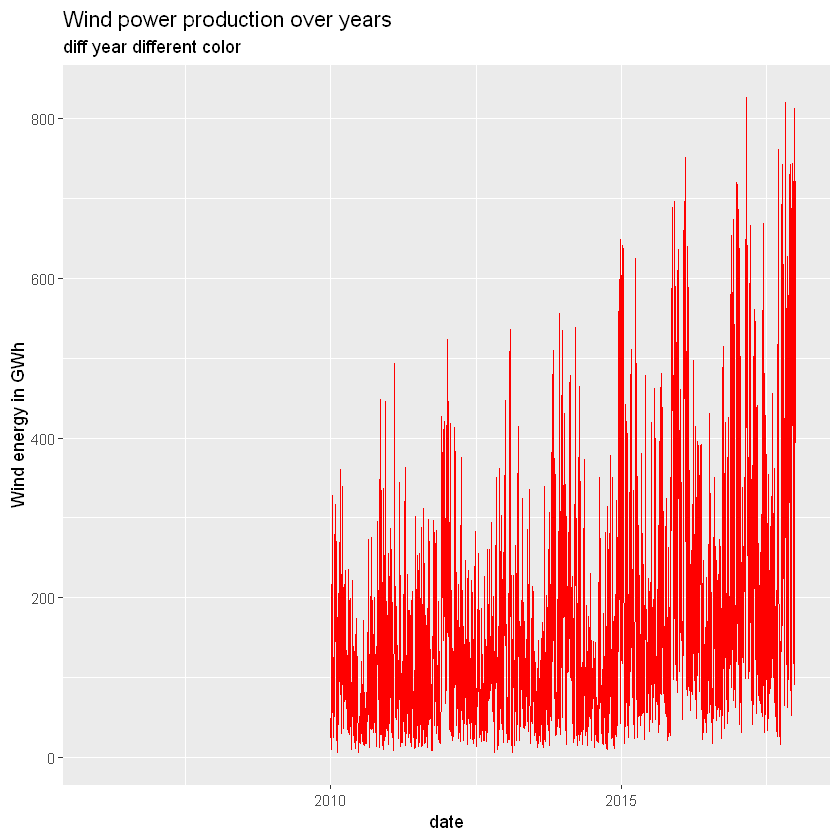

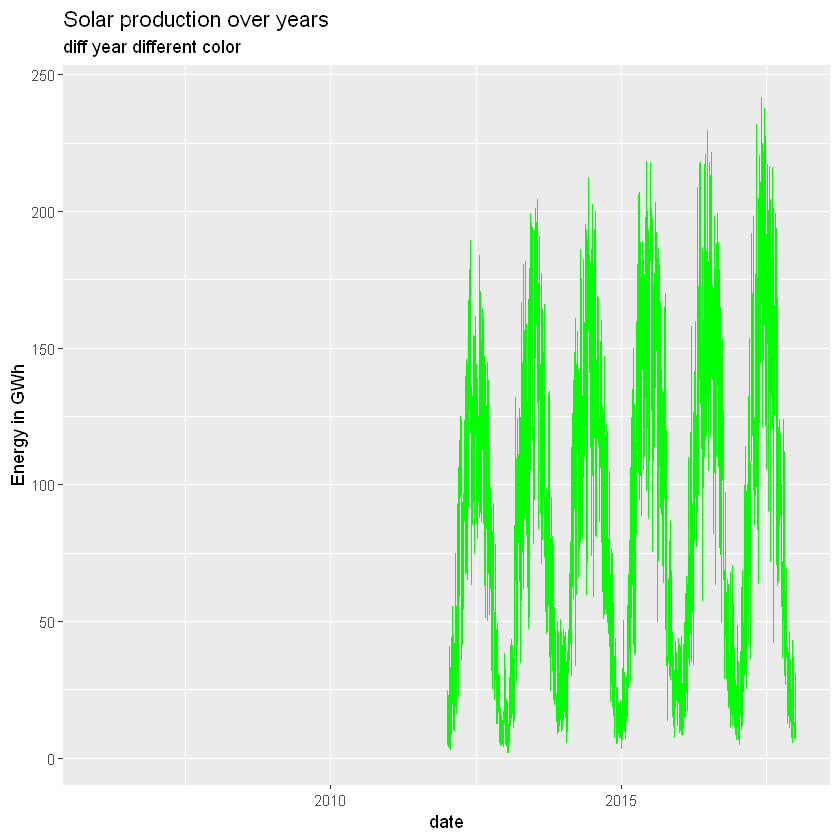

In [12]:
library(ggplot2)
ggplot(data=newdata)+geom_line(mapping=aes(x=Date,y=Consumption),colour="blue") + labs(title = "Consumption and date relation")+ labs(subtitle = "diff year different color") +labs(y="Consumption in GWh")+labs(x="date")

ggplot(data=newdata)+geom_line(mapping=aes(x=Date,y=Wind),colour="red") + labs(title = "Wind power production over years")+ labs(subtitle = "diff year different color") +labs(y="Wind energy in GWh")+labs(x="date")
ggplot(data=newdata)+geom_line(mapping=aes(x=Date,y=Solar),colour = "green") + labs(title = "Solar production over years")+ labs(subtitle = "diff year different color") +labs(y="Energy in GWh")+labs(x="date")

We don't get not much of data from this plot as all are line points We
then use the point plot.

Warning message:
"Removed 1463 rows containing missing values (geom_point)."

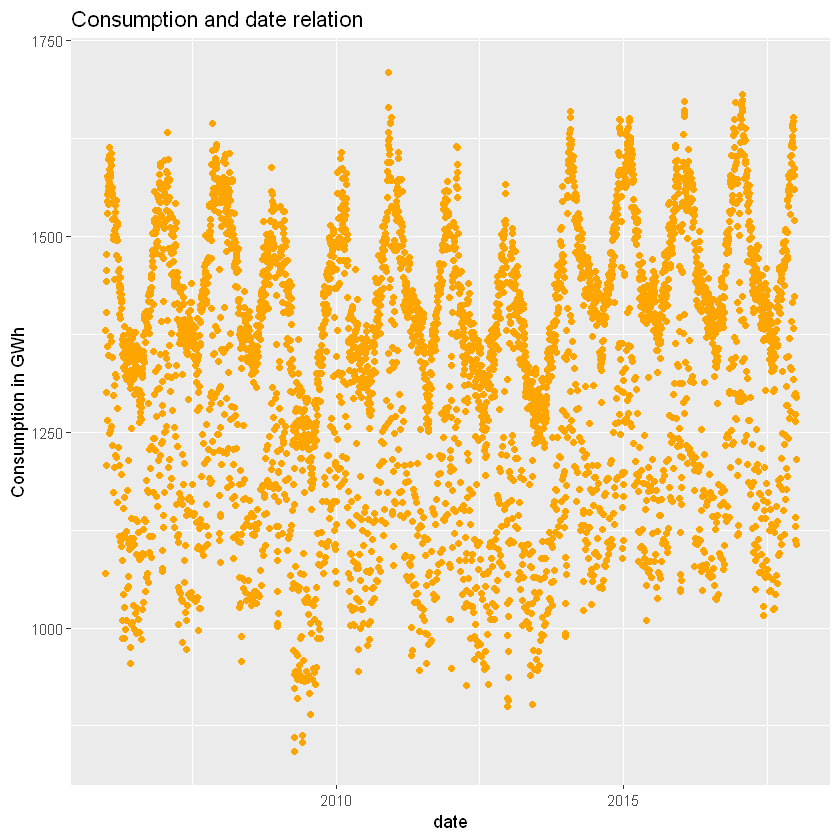

Warning message:
"Removed 2195 rows containing missing values (geom_point)."

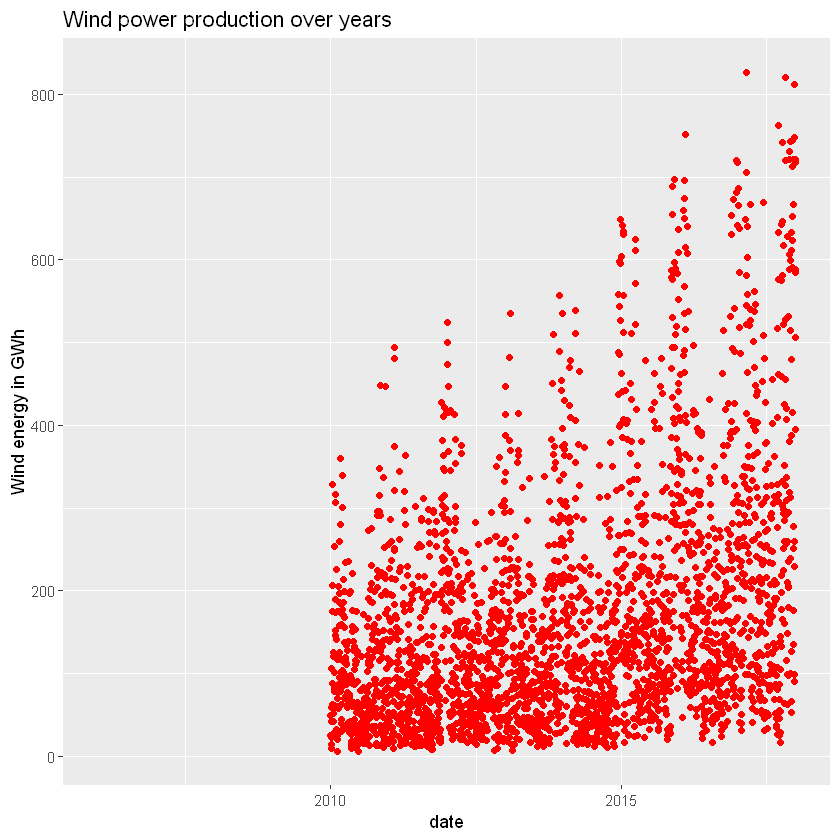

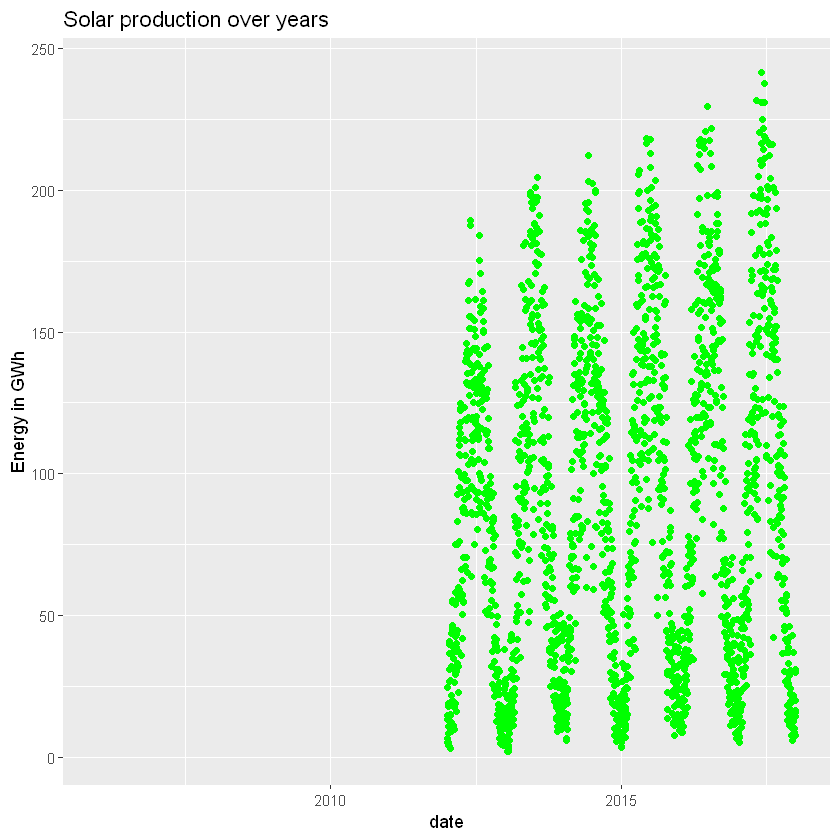

In [15]:

ggplot(data=newdata)+geom_point(mapping=aes(x=Date,y=Consumption,color=year),colour="orange") + labs(title = "Consumption and date relation")+labs(y="Consumption in GWh")+labs(x="date")
ggplot(data=newdata)+geom_point(mapping=aes(x=Date,y=Wind),colour="red") + labs(title = "Wind power production over years")  +labs(y="Wind energy in GWh")+labs(x="date")

ggplot(data=newdata)+geom_point(mapping=aes(x=Date,y=Solar),color="green") + labs(title = "Solar production over years")  +labs(y="Energy in GWh")+labs(x="date")

###### To see trend in a year let's see a part of 2 years from the dataset (using filter)

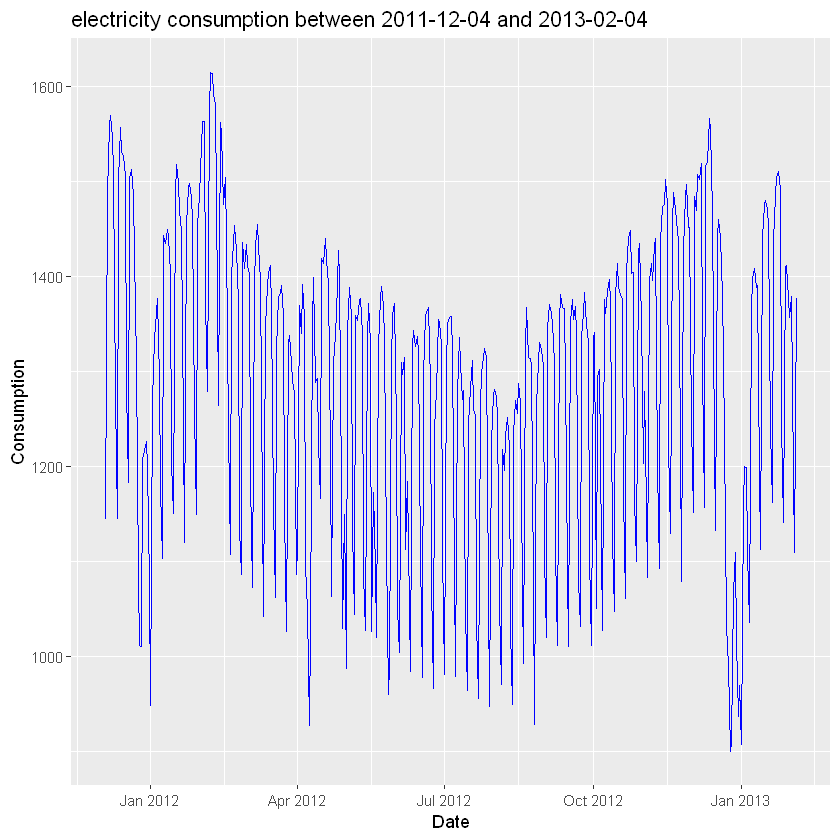

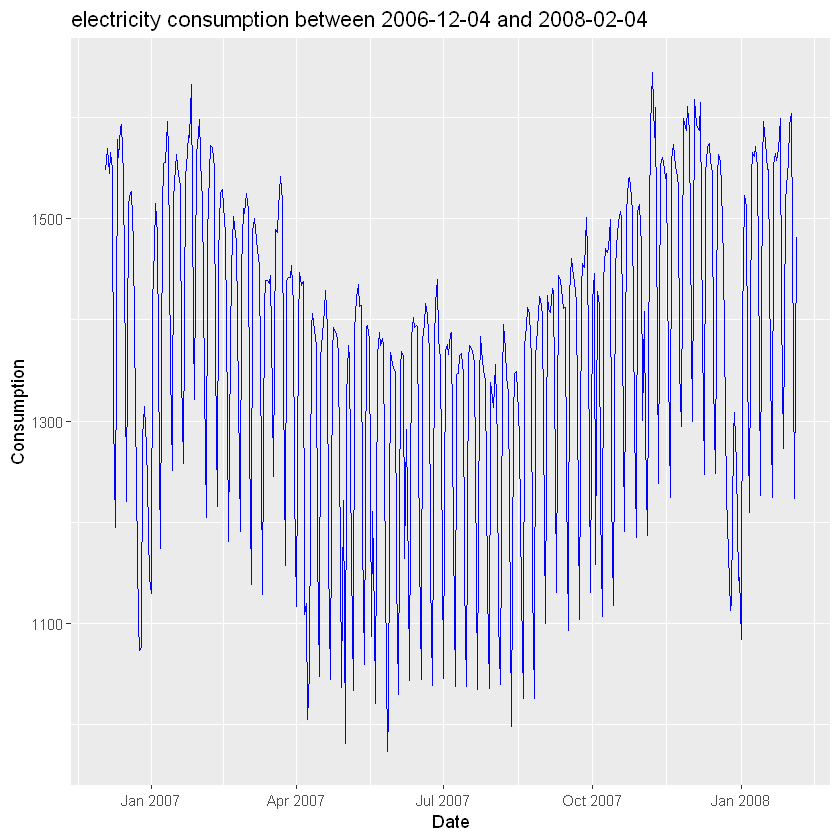

In [16]:
newdata %>% filter(Date>="2011-12-04"& Date<="2013-02-04")  %>%  ggplot()+geom_line(mapping=aes(x=Date,y=Consumption),colour="blue") +labs(title = "electricity consumption between 2011-12-04 and 2013-02-04 ")

newdata %>% filter(Date>="2006-12-04"& Date<="2008-02-04")  %>%  ggplot()+geom_line(mapping=aes(x=Date,y=Consumption),colour="blue") +labs(title = "electricity consumption between 2006-12-04 and 2008-02-04 ")

###### From the consumption data between 2011-12-04 and 2013-02-04 and between 2006-12-04 and 2008-02-04 It can be noted:

-   In summer the comsumption in both timeline decreases

-   during Winter the usage of electricity increases.(mostly due to
    heater usage)

-   there are significant drop of uasge during winter holiday (ie during
    Christmas and new year eve)

-   from the below point plot of consumption history between 2011-12-04
    and 2016-02-04 it is seen the consumption splits into 2 clusters.
    one around 1400 GWh and another around 1100 GWh and oscillates
    around these two values.(during weekands and weekdays )

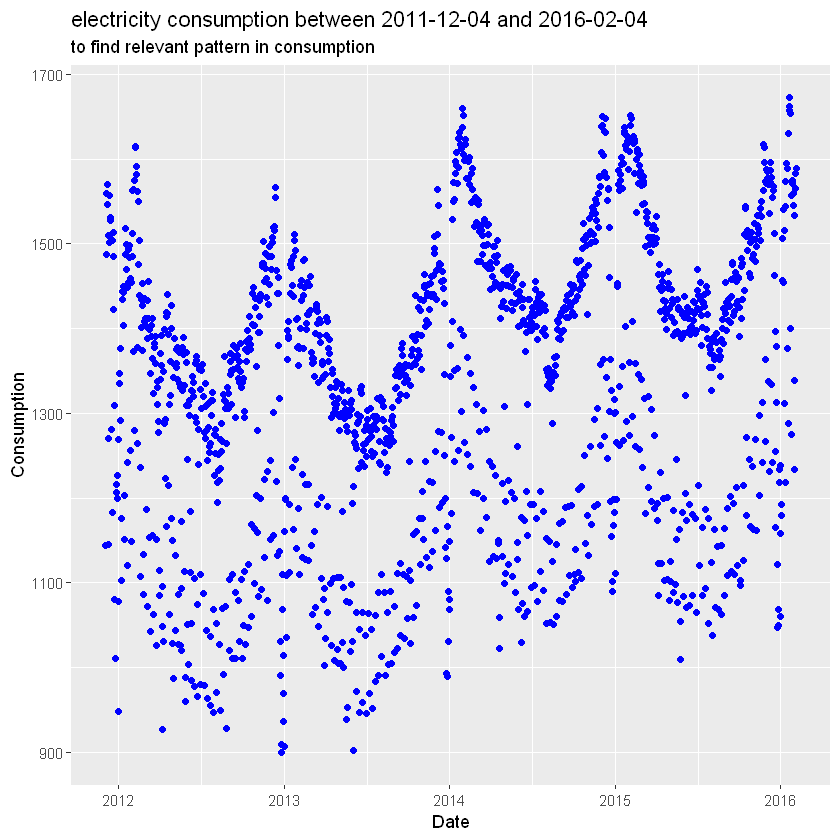

In [17]:
newdata %>% filter(Date>="2011-12-04"& Date<="2016-02-04")  %>%  ggplot()+geom_point(mapping=aes(x=Date,y=Consumption),colour="blue") +labs(title = "electricity consumption between 2011-12-04 and 2016-02-04 ")+ labs(subtitle = "to find relevant pattern in consumption")


#### about the solar power production variation lets take a different timespan

Warning message:
"Removed 1 rows containing missing values (geom_point)."

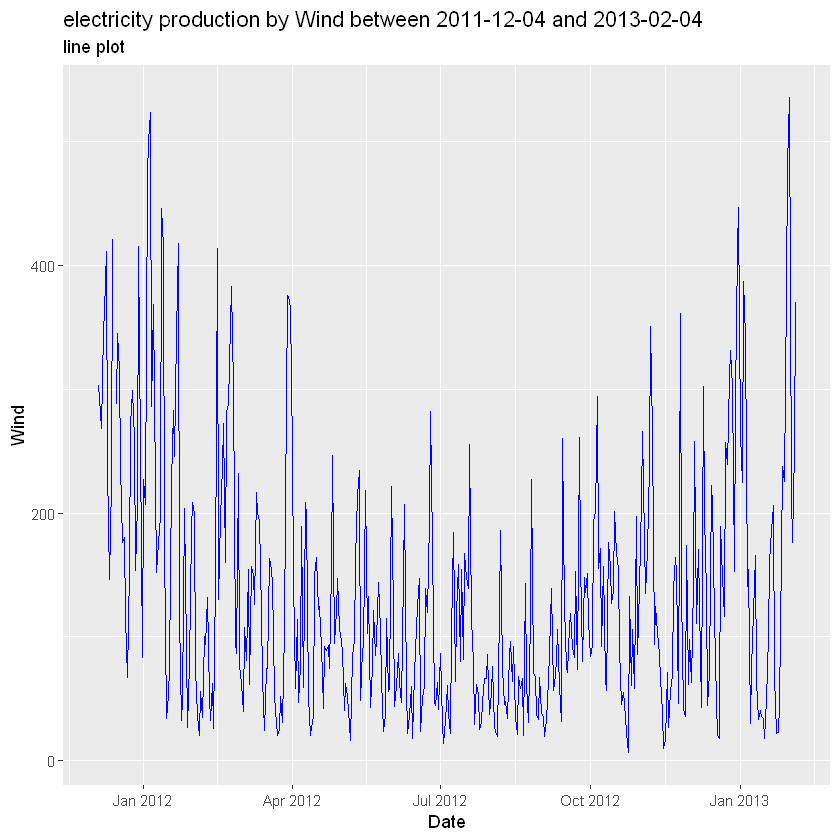

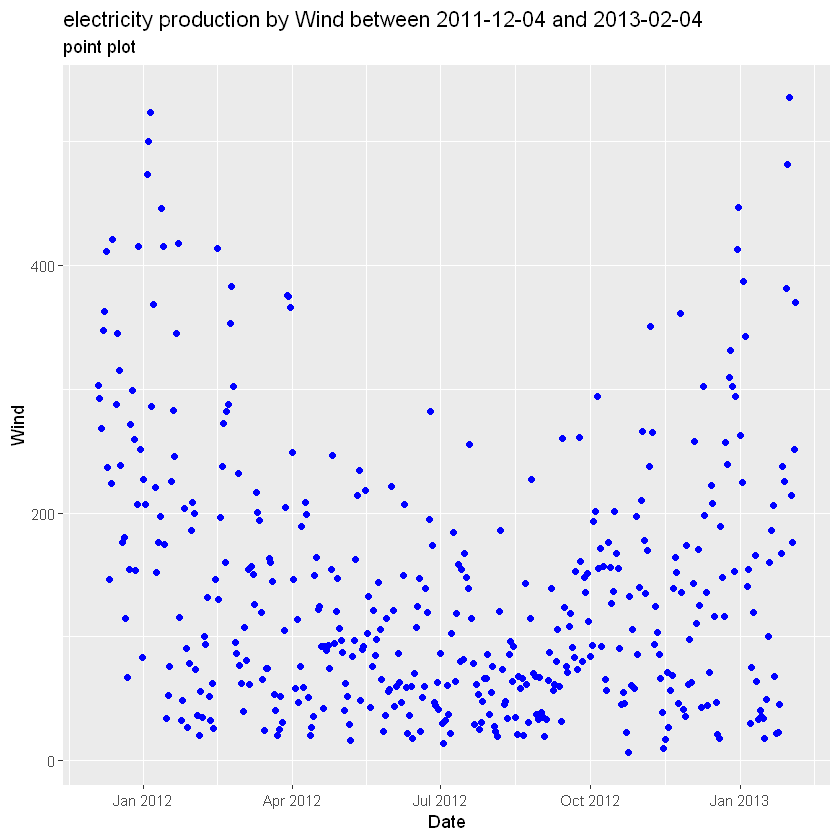

In [18]:
newdata %>% filter(Date>="2011-12-04"& Date<="2013-02-04")  %>%  ggplot()+geom_line(mapping=aes(x=Date,y=Wind),colour="blue") +labs(title = "electricity production by Wind between 2011-12-04 and 2013-02-04 ")+labs(subtitle = "line plot")
newdata %>% filter(Date>="2011-12-04"& Date<="2013-02-04")  %>%  ggplot()+geom_point(mapping=aes(x=Date,y=Wind),colour="blue") +labs(title = "electricity production by Wind between 2011-12-04 and 2013-02-04 ") +  labs(subtitle = "point plot")

#### conclusion:

-   Wind power production maxes out in Winter min in Summer

moreover from the whole data plot of Wind production:

Warning message:
"Removed 1461 rows containing missing values (geom_path)."

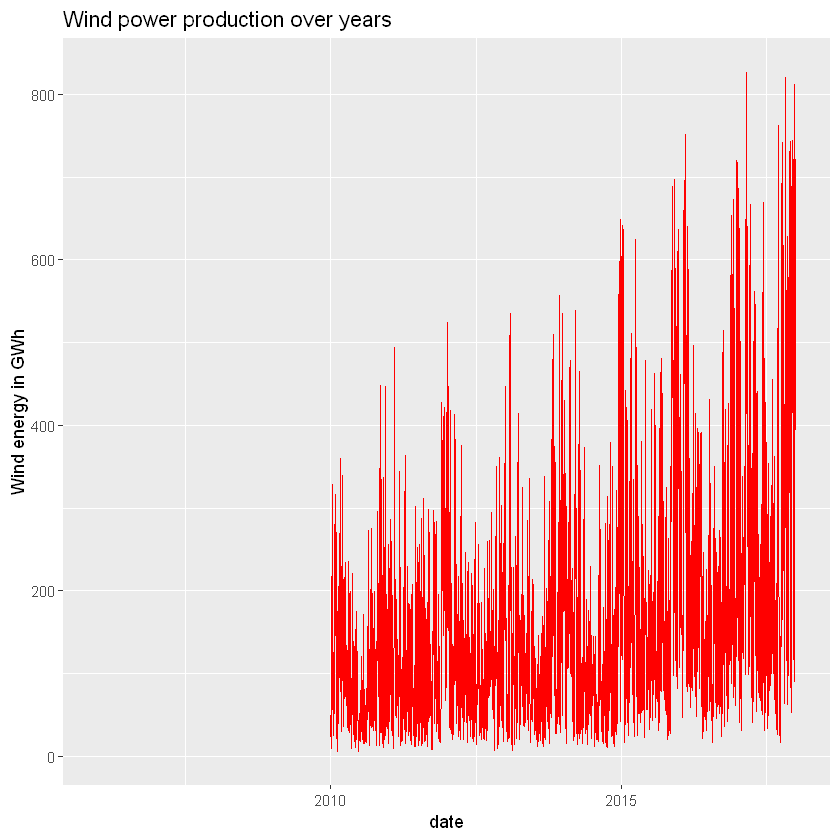

In [19]:
ggplot(data=newdata)+geom_line(mapping=aes(x=Date,y=Wind),colour="red") + labs(title = "Wind power production over years")  +labs(y="Wind energy in GWh")+labs(x="date")

**Over the years starting from 2010 the amount of energy production
gradually increases**

## #CONCLUSIONS:  

* there are periodicity happening in all three
parameters CONSUMPTION,WIND POWER PRODUCTION,SOLAR POWER PRODUCTION in
span of a year.
*  all three time series clearly exhibit
  periodicity---often referred to as seasonality in time series
analysis---in which a pattern repeats again and again at regular time
intervals. The Consumption, Solar, and Wind time series oscillate
between high and low values on a yearly time scale, corresponding with
the seasonal changes in weather over the year.

###### let's further look into monhly data and see how data varies over days of the month

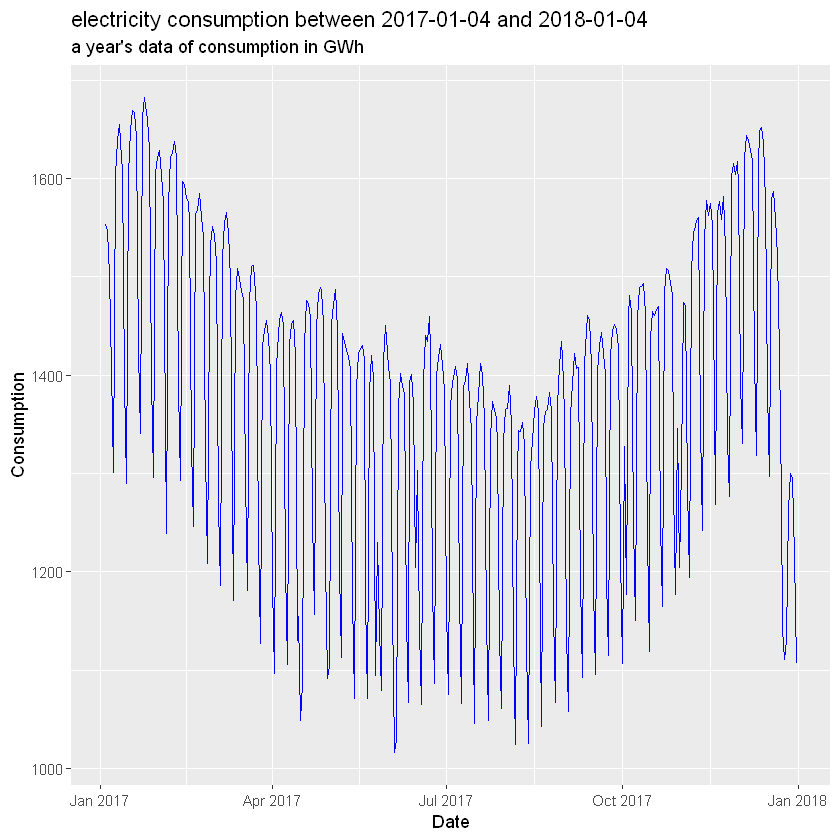

In [20]:
newdata %>% filter(Date>="2017-01-04"& Date<="2018-01-04")  %>%  ggplot()+geom_line(mapping=aes(x=Date,y=Consumption),colour="blue") +labs(title = "electricity consumption between 2017-01-04 and 2018-01-04 ") +labs(subtitle = "a year's data of consumption in GWh")


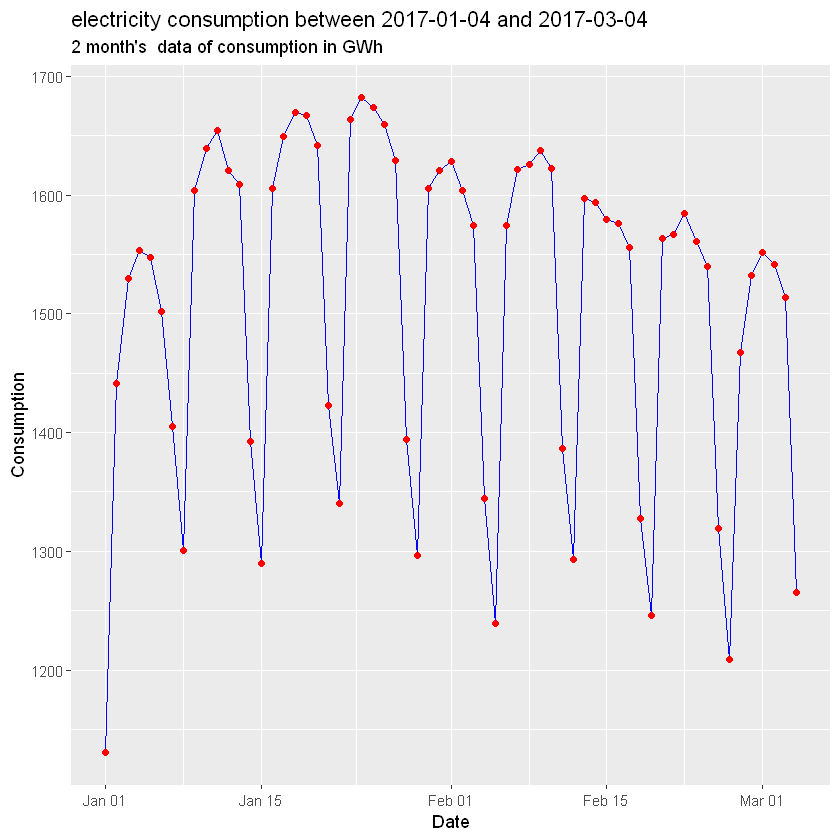

In [21]:
newdata %>% filter(Date>="2017-01-01"& Date<="2017-03-04")  %>%  ggplot()+geom_line(mapping=aes(x=Date,y=Consumption),colour="blue") +geom_point(mapping=aes(x=Date,y=Consumption),colour="red") +labs(title = "electricity consumption between 2017-01-04 and 2017-03-04 ") +labs(subtitle = "2 month's  data of consumption in GWh")

**As we suspected, consumption is highest on weekdays and lowest on
weekends.**

### Seasonality

Next, let's further explore the seasonality of our data with box plots

Warning message:
"Removed 1463 rows containing non-finite values (stat_boxplot)."

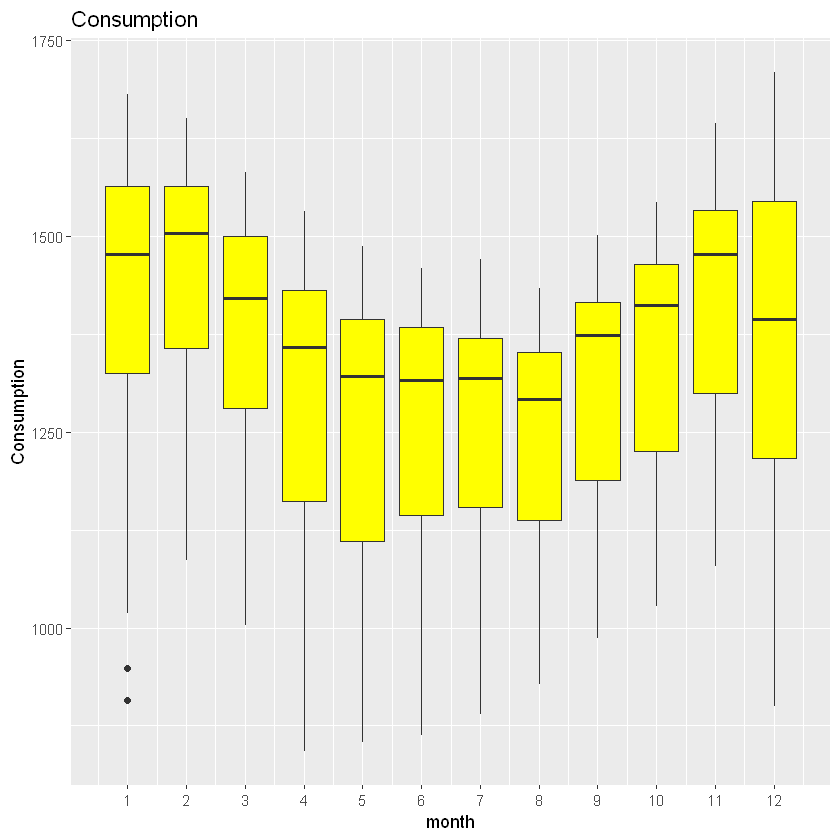

Warning message:
"Removed 2195 rows containing non-finite values (stat_boxplot)."

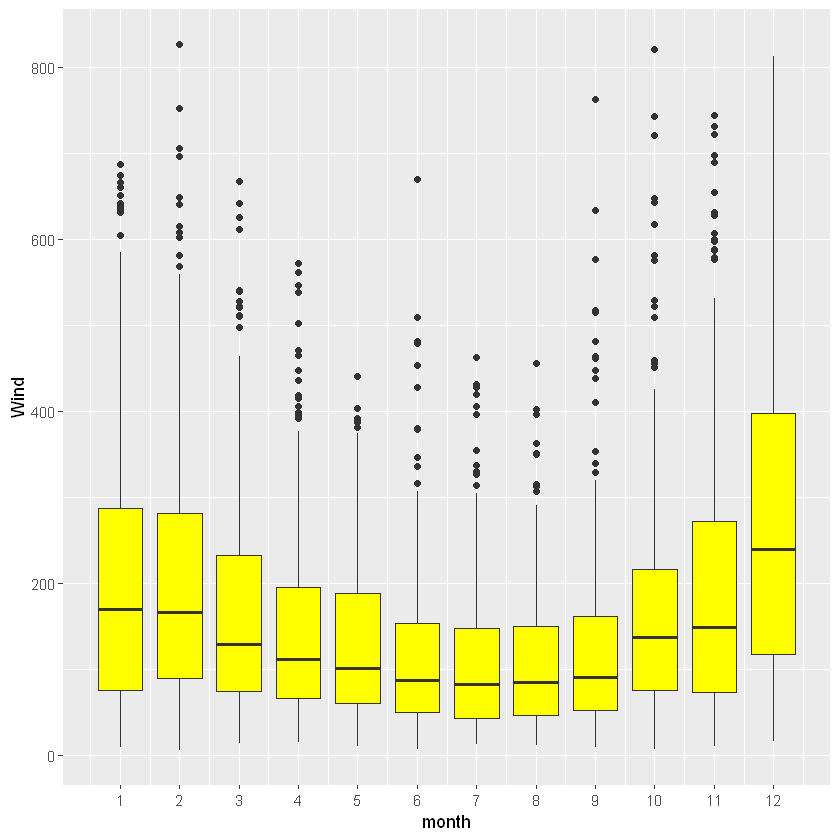

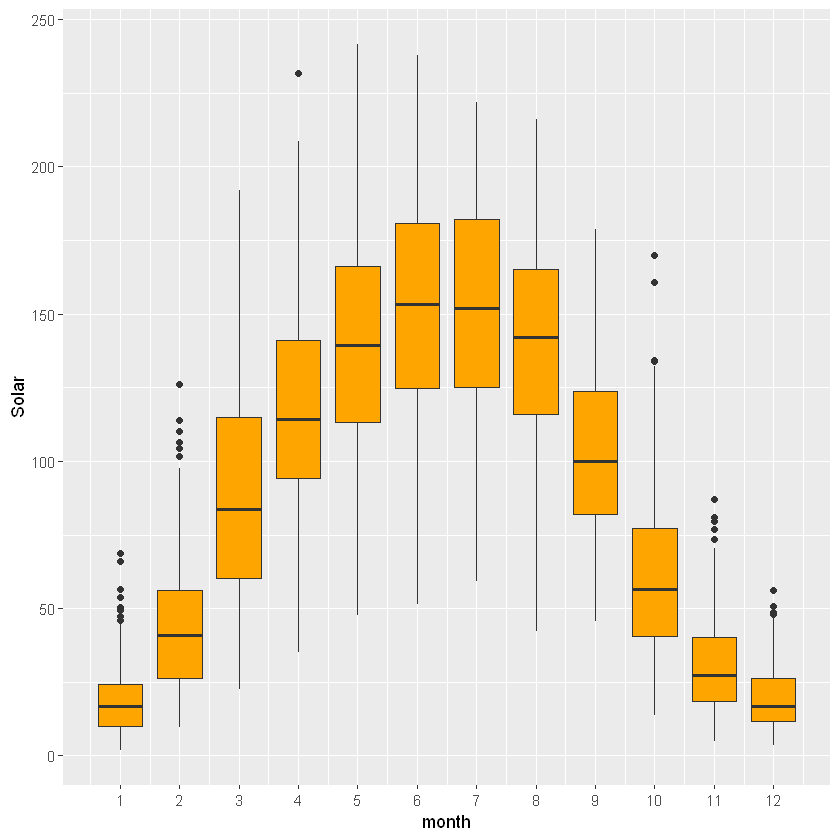

In [36]:

ggplot(data=newdata) +geom_boxplot(aes(group=month,x=month, y= Consumption),fill="yellow")+labs(title = "Consumption") +scale_x_continuous(breaks=c(1:12))
  
ggplot(data=newdata) +geom_boxplot(aes(group=month,x=month, y= Wind),fill="yellow")+scale_x_continuous(breaks=c(1:12)) 
ggplot(data=newdata) +geom_boxplot(aes(group=month,x=month, y= Solar),fill="orange")+ labs(x="month")+scale_x_continuous(breaks=c(1:12))


These box plots confirm the yearly seasonality that we saw in earlier
plots and provide some additional insights: \* electricity consumption
is generally higher in winter and lower in summer, the median and lower
two quartiles are lower in December and January compared to other
months. likely due to businesses being closed over the holidays. We saw
this in the time series for the year 2017, that for some points in JAN
and DEC there are consumptions much lower with respect to other points.

-   solar and wind power production both exhibit a yearly seasonality,
    the wind power distributions have many more outliers, reflecting the
    effects of occasional extreme wind speeds associated with storms and
    other transient weather conditions. ***points exiting the range of
    Q3+1.5 of IQR***

##### Next, let's group the electricity consumption time series by day of the week, to explore weekly seasonality.

**For that we need to enter the weekdays of the given data set

In [37]:
weekday<-weekdays(newdata$Date)
newdata<-cbind(newdata,weekday)

newdata$weekday <- factor(newdata$weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

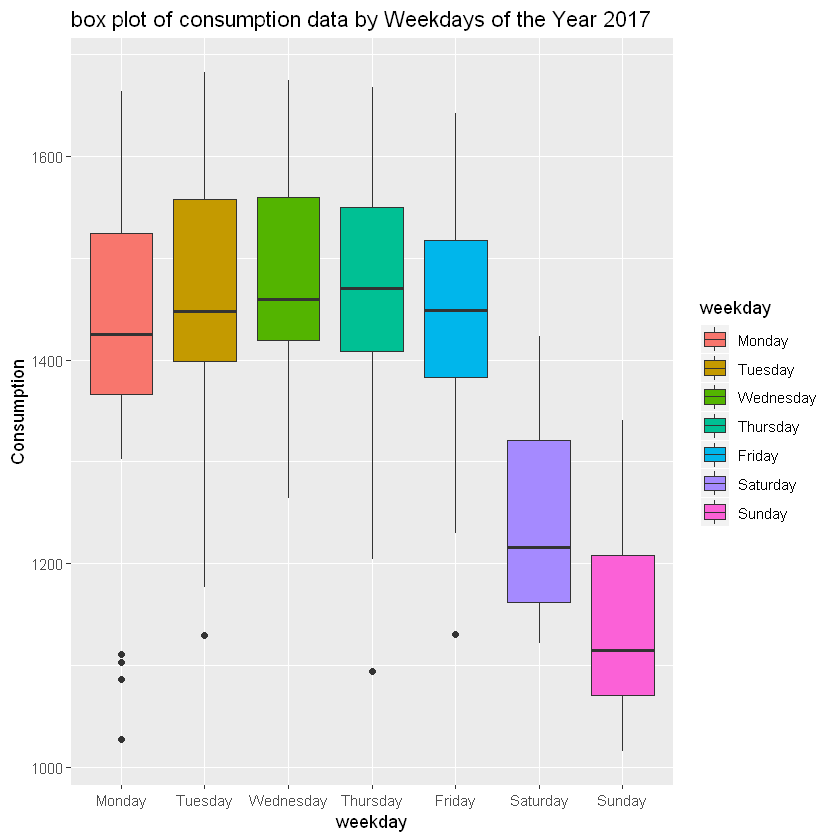

In [38]:
newdata %>% filter(year=="2017") %>% ggplot() +geom_boxplot(aes(group=weekday,x=weekday, y= Consumption,fill=weekday))+labs(title = "box plot of consumption data by Weekdays of the Year 2017")

As expected, electricity consumption is significantly higher on weekdays
than on weekends. The low outliers on weekdays are presumably during
holidays.


#### Now to get the continous mean of the data of consumption

In [41]:
library(dplyr)
library(zoo)
library(dplyr)
library(zoo)
test1data<- newdata  %>% arrange(day)%>% arrange(month) %>% arrange(year)  %>%  mutate(avg_of_7 =rollmean(Consumption,k=7,fill = NA) ) 


In [43]:
test2data<- test1data  %>% arrange(day)%>% arrange(month) %>% arrange(year)  %>%  mutate(avg_of_3 =rollmean(Consumption,k=3,fill = NA)) 


testdata<- test2data  %>% arrange(day)%>% arrange(month) %>% arrange(year)  %>%  mutate(avg_of_365 =rollmean(Consumption,k=365,fill = NA)) 


#### trend of rollMeans of 7,3,365 days 



In [44]:
data_new<- data.frame(x=testdata$Date,y=c(testdata$avg_of_7,testdata$avg_of_3,testdata$avg_of_365),group=c(rep("avg_of_7",nrow(testdata)),rep("avg_of_3",nrow(testdata)),rep("avg_of_365",nrow(testdata))))




## framing long data set 

Warning message:
"Removed 372 rows containing missing values (geom_path)."

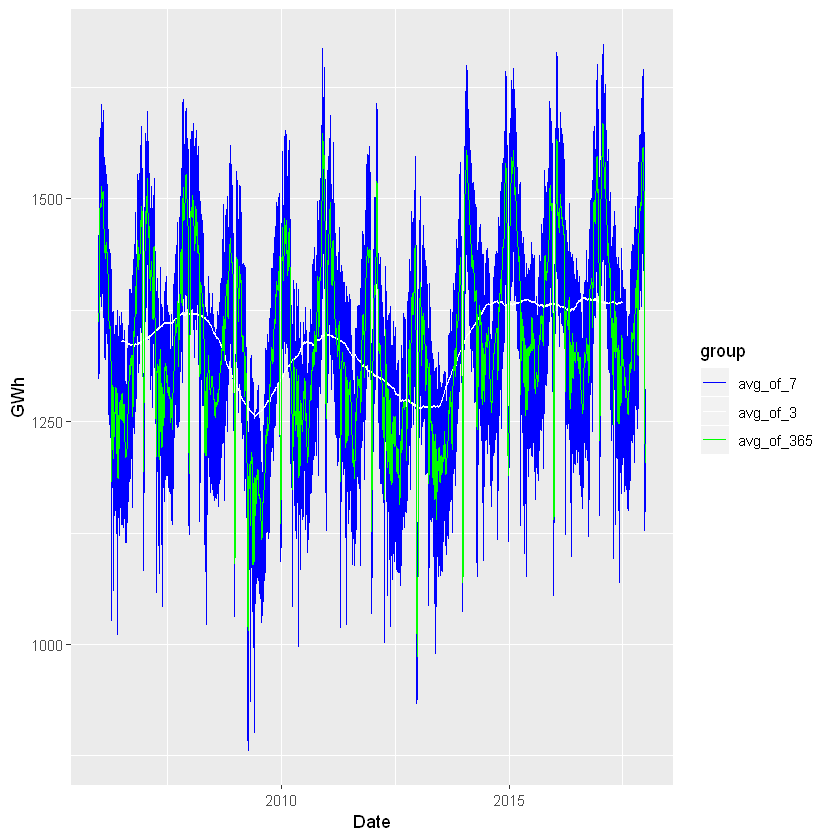

In [45]:
ggplot(data=data_new) +geom_line(mapping = aes(x,y,col=group))+scale_colour_manual(values=c("avg_of_7"="green", "avg_of_3"="blue", "avg_of_365"="white"), 
                                                                                   labels=c("avg_of_7", "avg_of_3", "avg_of_365"))+xlab("Date")+ylab("GWh")


#plotting and using custom legend

### Conclusion from the trend:
* the 3 and 7 day mean data of consumption is still fluctuating in nature 
* the 365 days rollMean/continous mean is still having almost similar range of results throughout the data cycle